## YUV color space
Colors in images can be encoded in different ways. Most well known is perhaps the RGB-encoding, in which the image consists of a Red, Green, and Blue channel. However, there are many other encodings, which sometimes have arisen for historical reasons or to better comply with properties of human perception. The YUV color space has arisen in order to better deal with transmission or compression artifacts; when using YUV instead of RGB, these artifacts will less easily be detected by humans. YUV consists of one luma component (Y) and two chrominance (color) components (UV). 

Many cameras used in robotics directly output YUV-encoded images. Although these images can be converted to RGB, this conversion costs computation time, so it is better to work directly in YUV-space. The YUV color space is aptly explained on <A HREF="https://en.wikipedia.org/wiki/YUV" TARGET="_blank">Wikipedia</A>. It also contains an image on the U and V axes, for a value of Y$=0.5$. However, using this image for determining thresholds on U and V for color detection may lead to suboptimal results. 

<font color='red'><B>Exercise 1</B></font>
Generate slices of the YUV space below, with the help of the script `YUV_slices.py` <A HREF="https://github.com/guidoAI/YUV_notebook/blob/master/YUV_slices.py" TARGET="_blank">(link to file)</A>. You can change the number of slices (`n_slices`) and the height and width (`H`, `W`) of the generated images. 

1. Why can determining thresholds at Y$=0.5$ lead to suboptimal results?
2. What U and V thresholds would you set for detecting orange? And for green?
3. Can you think of a better way than setting a threshold on U and V for determining if a pixel belongs to a certain color?


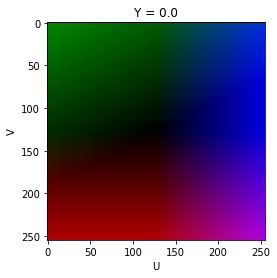

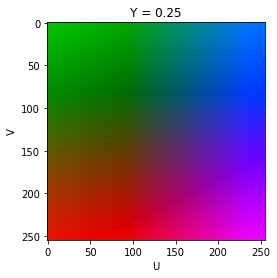

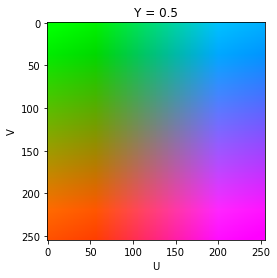

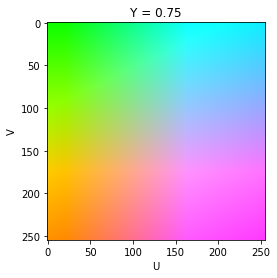

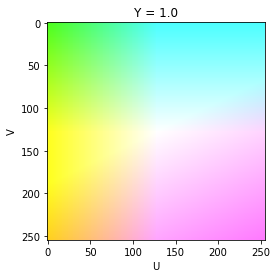

In [1]:
%matplotlib inline
import YUV_slices as YUV

n_slices = 5;
YUV.generate_slices_YUV(n_slices);

## Color filtering

The code below loads an image and filters the colors. 

In [7]:
%matplotlib inline
import cv2;
import numpy as np;
import matplotlib.pyplot as plt
#BlackPanel
#OrangePole
def filter_color(image_name = 'OrangePole.jpg', y_low = 50, y_high = 200, \
                 u_low = 120, u_high = 130, v_low = 120, v_high = 130, resize_factor=1):
    im = cv2.imread(image_name);
    im = cv2.resize(im, (int(im.shape[1]/resize_factor), int(im.shape[0]/resize_factor)));
    YUV = cv2.cvtColor(im, cv2.COLOR_BGR2YUV);
    
    Y = YUV[:,:,0]
    U = YUV[:,:,1]
    V = YUV[:,:,2]
    
    Yblur = cv2.blur(Y, (10,10))
    
    Yedges = cv2.Canny(Yblur, 100, 150, apertureSize=5)
    
    contours, hierarchy = cv2.findContours(Yedges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.drawContours(Yblur, contours, -1, (255, 255, 255), 3)
    
    Yblur = cv2.fillPoly(Yblur, pts =contours, color=(255,255,255))
    
    """
    Filtered = np.zeros([YUV.shape[0], YUV.shape[1]]);
    for y in range(YUV.shape[0]):
        for x in range(YUV.shape[1]):
            if(YUV[y,x,0] >= y_low and YUV[y,x,0] <= y_high and \
               YUV[y,x,1] >= u_low and YUV[y,x,1] <= u_high and \
               YUV[y,x,2] >= v_low and YUV[y,x,2] <= v_high):
                Filtered[y,x] = 1;
    
    
    plt.figure();
    RGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB);
    plt.imshow(RGB);
    plt.title('Original image');
    
    plt.figure()
    plt.imshow(Filtered);
    plt.title('Filtered image');
    """
    plt.figure()
    plt.imshow(Y, cmap='gray');
    plt.title('Gray image');
    
    plt.figure()
    plt.imshow(Yedges, cmap='gray');
    plt.title('Gray image');
    
    plt.figure()
    plt.imshow(Yblur, cmap='gray');
    plt.title('Gray image');
    
    

<font color='red'><B>Exercise 2</B></font>

Please answer the questions of this exercise, by changing and running the code block below. Note that Y, U, and V are all in the range $[0, 255]$.

1. Can you find an easy way to make the code run faster, while still being able to evaluate if your filter works?
2. Can you filter the colors, so that only the tulip remains?
3. Can you filter the colors, so that only the stem remains?

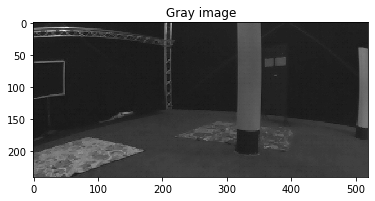

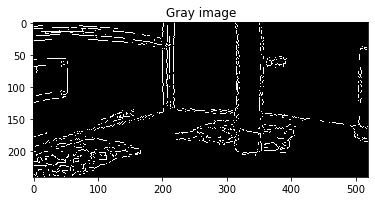

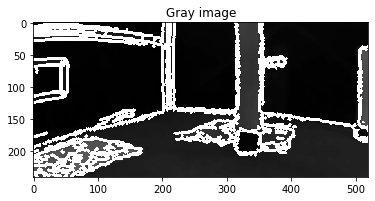

In [8]:
filter_color(y_low = 50, y_high = 200, u_low = 60, u_high = 160, v_low = 60, v_high = 160);

## Answers
Exercise 1:
1. Colors and color regions are different for different Y values. What is orange at one value of Y can be a different color (e.g., red) at another value of Y.
2. Green: low U, low V (e.g., [0,120], [0,120]). Orange: low U, relatively high V (e.g., [0,120], [160,220])
3. Include the Y in the selection of the threshold, e.g., as in a look-up table (different U and V depending on Y), or by determining a prototype pixel for each different "color" and when classifying a pixel, determining which prototype is closest in YUV-space.

Exercise 2:
1. Set the resize_factor to a factor larger than 1. Setting it to 4 makes the filtering faster, while it is still possible to evaluate the success of the filter. 
2. ``y_low = 50, y_high = 200, u_low = 0, u_high = 120, v_low = 160, v_high = 220``
3. ``y_low = 50, y_high = 200, u_low = 0, u_high = 120, v_low = 0, v_high = 120``